/Users/caca/Documents/ds/first_ds_project/notebooks/../scripts/load_data.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_completion_date'] = pd.to_datetime(df_filtered['order_completion_date'])
/Users/caca/Documents/ds/first_ds_project/notebooks/../scripts/load_data.py:17: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  customer_df = df.groupby('username').agg(


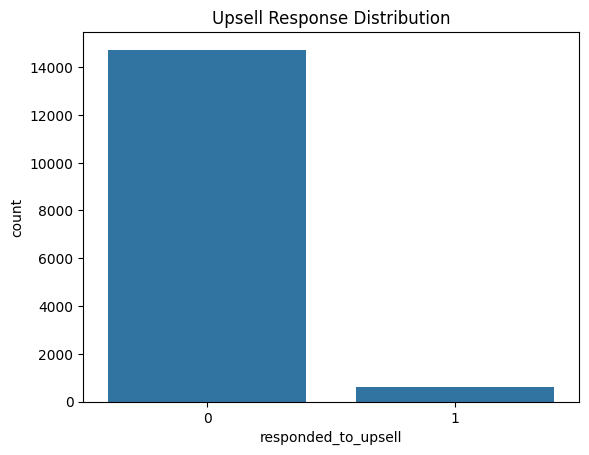

CACACA username               0
total_orders           0
total_spent            0
recency_days           0
aov                    0
responded_to_upsell    0
dtype: int64
[[2628  319]
 [   0  125]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2947
           1       0.28      1.00      0.44       125

    accuracy                           0.90      3072
   macro avg       0.64      0.95      0.69      3072
weighted avg       0.97      0.90      0.92      3072



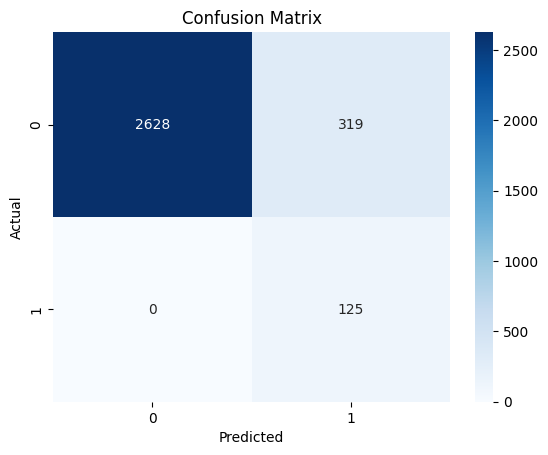

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import sys
sys.path.append('../scripts')
from load_data import load_and_clean_data, customer_df_responded_to_upsell

df = load_and_clean_data()
customer_df = customer_df_responded_to_upsell(df)

# check the target distribution
sns.countplot(data=customer_df, x='responded_to_upsell')
plt.title("Upsell Response Distribution")
plt.show()

# select feature
features = ['total_orders', 'total_spent', 'recency_days', 'aov']
X = customer_df[features]
y = customer_df['responded_to_upsell']

# standardize feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# train model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# evalute model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# # classification metrics
# print("classification Report")
# print(classification_report, y_test, y_pred)

# confussion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

